# EDA and Modeling Steps

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
recipe_df = pd.read_pickle("recipe_df_filtered.pkl")

In [10]:
recipe_df.shape

(105543, 10)

## 1. EDA

##### **1.1 Converting NER_list from a list to a string.**

In [12]:
def ingredient_parse_list(NER):
    return re.findall(r'"([^"]*)"',NER) # "([^"]*)" extracts the words within quotation marks

recipe_df['NER_list'] = recipe_df['NER'].apply(ingredient_parse_list)
print(recipe_df['NER_list'])

0         [frozen corn, cream cheese, butter, garlic pow...
1         [broccoli, bacon, green onions, raisins, mayon...
2         [ground beef, tomato juice, oats, egg, onion, ...
3         [long, cooking oil, tomato sauce, water, brown...
4         [flour, baking powder, salt, butter, sugar, eg...
                                ...                        
105538    [stuffing mix, butter, chicken broth, chicken,...
105539    [margarine, Sugar, Blackberries, almonds, Bisq...
105540    [broken wheat, water, jaggery grated, coconut ...
105541    [red Boysenberries, chocolate, whipped cream, ...
105542    [Bread, Grated cheese, Onions, Green peppers, ...
Name: NER_list, Length: 105543, dtype: object


Here we can see that the resulting dataframe has a new column name `NER_list` where it lists the name of the ingredients without the quotation marks.

In [16]:
recipe_df.head()

,title,ingredients,directions,link,source,NER,serving_size,NER_list,ingredient_counter,Meal_Type
0,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",6,"[frozen corn, cream cheese, butter, garlic pow...",6,dinner
1,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""1...","[""Trim off large leaves of broccoli and remove...",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins...",6,"[broccoli, bacon, green onions, raisins, mayon...",7,salad
2,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"",...","[""Mix well."", ""Press firmly into an 8 1/2 x 4 ...",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"",...",8,"[ground beef, tomato juice, oats, egg, onion, ...",7,lunch
3,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sli...","[""Brown strips in cooking oil."", ""Pour off dri...",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water...",8,"[long, cooking oil, tomato sauce, water, brown...",8,dinner
4,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking pow...","[""Sift flour, baking powder and salt together....",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""...",24,"[flour, baking powder, salt, butter, sugar, eg...",8,dessert


In [18]:
ingredient_list_df = pd.DataFrame(recipe_df['NER_list'])

In [20]:
print(type(ingredient_list_df.loc[0,'NER_list']))

<class 'list'>


Looking at the data type of the contents within column `NER_list` it can be seen that these values are a list and not a string. In the EDA step, I am going to be look into frequency of the ingredients to gain more insights from this dataset, so I need these values in a string format to break up the list.

In [15]:
def list_to_string(s):

    str1 = ", "

    return (str1.join(s))

In [17]:
ingredient_list_df = pd.DataFrame(ingredient_list_df['NER_list'].apply(list_to_string))
ingredient_list_df.head()

,NER_list
0,"frozen corn, cream cheese, butter, garlic powd..."
1,"broccoli, bacon, green onions, raisins, mayonn..."
2,"ground beef, tomato juice, oats, egg, onion, p..."
3,"long, cooking oil, tomato sauce, water, brown ..."
4,"flour, baking powder, salt, butter, sugar, egg..."


In [19]:
print(type(ingredient_list_df.loc[0,'NER_list']))

<class 'str'>


`NER_list` now holds a string value that I can split in the EDA process.

In [23]:
ingredient_list_df

,NER_list
0,"frozen corn, cream cheese, butter, garlic powd..."
1,"broccoli, bacon, green onions, raisins, mayonn..."
2,"ground beef, tomato juice, oats, egg, onion, p..."
3,"long, cooking oil, tomato sauce, water, brown ..."
4,"flour, baking powder, salt, butter, sugar, egg..."
...,...
105538,"stuffing mix, butter, chicken broth, chicken, ..."
105539,"margarine, Sugar, Blackberries, almonds, Bisqu..."
105540,"broken wheat, water, jaggery grated, coconut l..."
105541,"red Boysenberries, chocolate, whipped cream, C..."


##### **1.2 Tokenizing the `NER_list` column to get a word counter for ingredients.**

In [23]:
ingredient_list_df['NER_list'].str.split(', ')

0         [frozen corn, cream cheese, butter, garlic pow...
1         [broccoli, bacon, green onions, raisins, mayon...
2         [ground beef, tomato juice, oats, egg, onion, ...
3         [long, cooking oil, tomato sauce, water, brown...
4         [flour, baking powder, salt, butter, sugar, eg...
                                ...                        
105538    [stuffing mix, butter, chicken broth, chicken,...
105539    [margarine, Sugar, Blackberries, almonds, Bisq...
105540    [broken wheat, water, jaggery grated, coconut ...
105541    [red Boysenberries, chocolate, whipped cream, ...
105542    [Bread, Grated cheese, Onions, Green peppers, ...
Name: NER_list, Length: 105543, dtype: object

We now need to take this  tokenized  corpus and make the document-term matrix using the bag of words model. We can do that using the `CountVectorizer()` function from Sklearn. Let's fit it first and talk about what we are seeing.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(ingredient_list_df['NER_list'])

# 3. Transform
ingredient_list_transformed = bagofwords.transform(ingredient_list_df['NER_list'])
ingredient_list_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1261886 stored elements and shape (105543, 5529)>

In [29]:
ingredient_list_transformed = ingredient_list_transformed.astype(np.int32) #transforming to int32 to help with memory issues later on 

In [31]:
ingredient_list_transformed.dtype

dtype('int32')

In [33]:
bagofwords.get_feature_names_out()

array(['___', '____', '_____', ..., 'zucchini', 'zucchinis', 'zwieback'],
      dtype=object)

In [35]:
ingredient_list_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [37]:
ingredient_list_binary_matrix = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=ingredient_list_transformed.toarray())

In [39]:
ingredient_list_binary_matrix

,___,____,_____,______,abalone,absolut,abt,aburaage,aburage,acacia,...,zesty,zinfandel,zinger,ziplock,ziti,zone,zucchine,zucchini,zucchinis,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


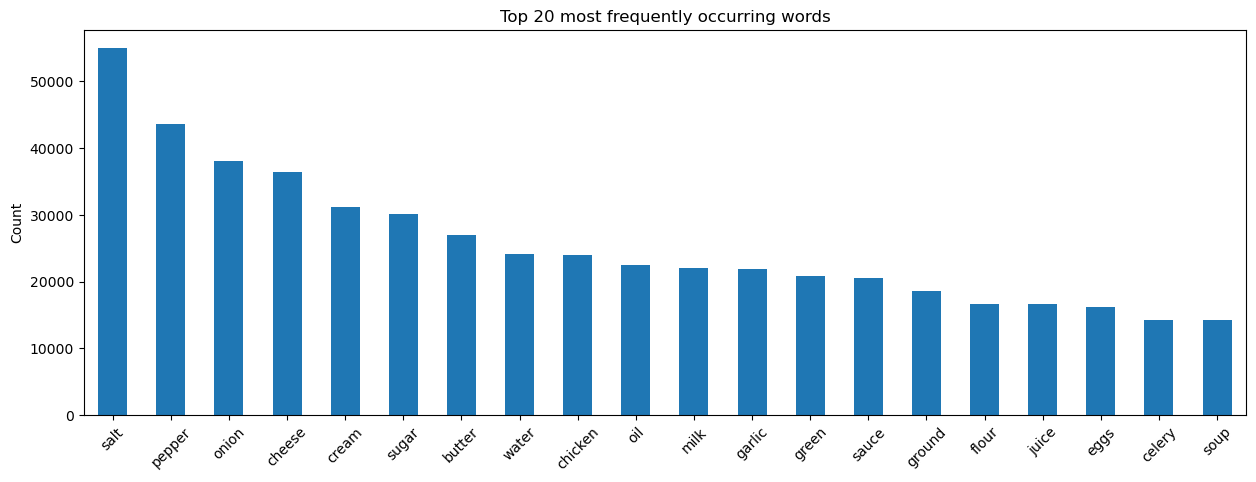

In [155]:
word_counts = pd.DataFrame(
    {"counts": ingredient_list_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### **1.3 Histograms to Look at the Distribution of our Numerical Columns.**

Histogram plot of `serving_size`

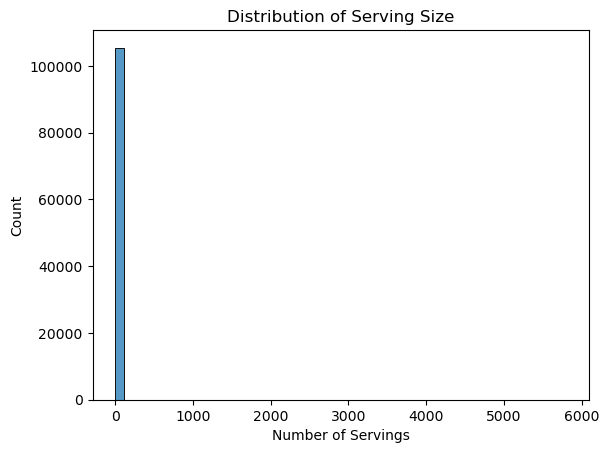

In [164]:
plt.figure()
sns.histplot(recipe_df['serving_size'], bins=50)
plt.title('Distribution of Serving Size')
plt.xlabel('Number of Servings')
plt.ylabel('Count')
plt.show()

In [169]:
recipe_df['serving_size'].describe()

count    105543.000000
mean          8.253205
std          45.561278
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max        5800.000000
Name: serving_size, dtype: float64

Histogram plot of `ingredient_counter`

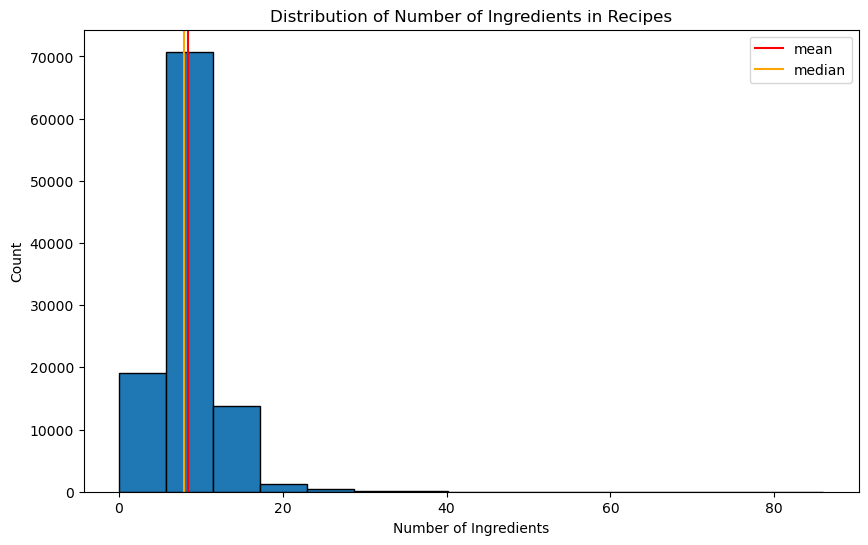

In [178]:
plt.figure(figsize=(10,6))
recipe_df.ingredient_counter.hist(bins=15, grid=False, edgecolor='black')
plt.title('Distribution of Number of Ingredients in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')

plt.axvline(recipe_df['ingredient_counter'].mean(), c = 'red', label='mean')
plt.axvline(recipe_df['ingredient_counter'].median(), c = 'orange', label='median')

plt.legend()
plt.show()

In [181]:
recipe_df['ingredient_counter'].describe()

count    105543.000000
mean          8.393726
std           3.534658
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          86.000000
Name: ingredient_counter, dtype: float64

##### **1.4 Tokenizing the `title` column to understand frequency of words used in name of recipe**

In [186]:
title_df = pd.DataFrame(recipe_df['title'])

In [189]:
title_df['title'].str.split(' ')

0                                            [Creamy, Corn]
1                                         [Broccoli, Salad]
2                               [Prize-Winning, Meat, Loaf]
3                  [Corral, Barbecued, Beef, Steak, Strips]
4                                  [Mexican, Cookie, Rings]
                                ...                        
105538                     [Chicken, Stuffing, Mix, Recipe]
105539             [Blackberry, Upside, Down, Cake, Recipe]
105540    [Broken, Wheat, Pudding, (, Lapsi, Kheer, ), R...
105541                      [Boysenberry, Tiramisu, Recipe]
105542              [Bread, And, Cheese, Casserole, Recipe]
Name: title, Length: 105543, dtype: object

In [192]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Remove stopwords

In [196]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english")

# 2. Fit 
bagofwords.fit(title_df['title'])

# 3. Transform
title_df_stopwordsremoved = bagofwords.transform(title_df['title'])
title_df_stopwordsremoved

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 338159 stored elements and shape (105543, 12410)>

In [199]:
my_df_title_stopwordsremoved = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=title_df_stopwordsremoved.toarray())
display(my_df_title_stopwordsremoved)

,00,000,05,08,10,100,1015,108,10pts,11,...,zuke,zuni,zunka,zupa,zuppa,zurish,zwezerikballetjes,zwiebelrahm,zwina,äpfeln
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


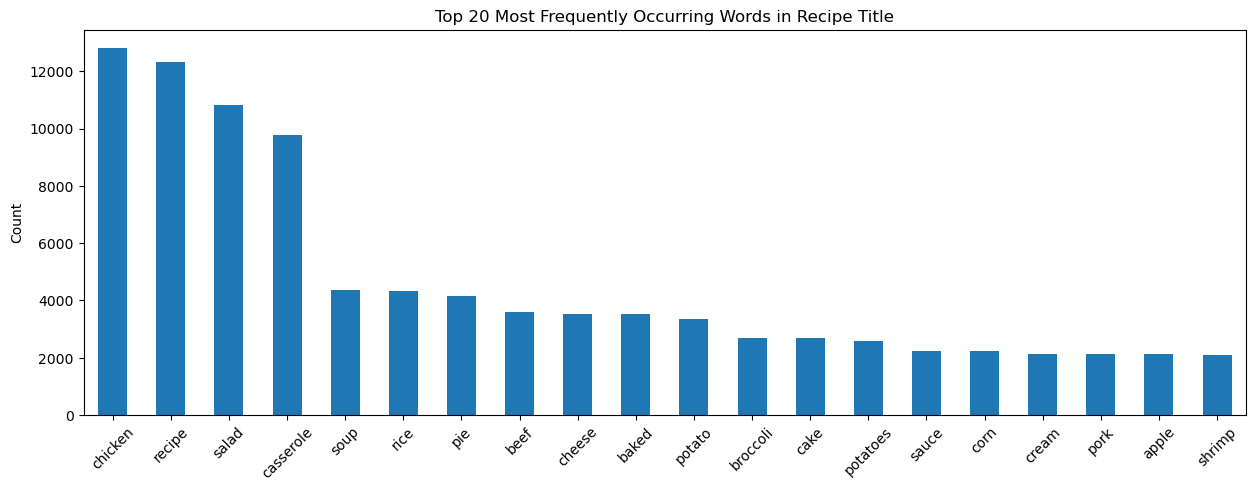

In [202]:
word_counts = pd.DataFrame(
    {"counts": title_df_stopwordsremoved.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Most Frequently Occurring Words in Recipe Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 2. Combining Dataframe with One Hot Encoded BoW Sparse Matrix and Meal Type Dummies

In [41]:
meal_type_dummies = pd.get_dummies(recipe_df['Meal_Type'], dtype='int32')

In [43]:
meal_type_dummies

,breakfast,dessert,dinner,drink,lunch,salad
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
105538,0,0,1,0,0,0
105539,0,1,0,0,0,0
105540,0,1,0,0,0,0
105541,0,1,0,0,0,0


In [45]:
recipe_df = pd.concat([recipe_df, ingredient_list_binary_matrix, meal_type_dummies], axis=1)

### 3. Content-Based Recommendation System

### 3.1 Filtering Dataset by Ingredient Counter (less than or equal to 8 ingredients) Due to Memory Constraints

In [5]:
eight_ingredients = recipe_df[recipe_df['ingredient_counter'] <=8]

In [7]:
eight_ingredients=eight_ingredients.reset_index()

In [51]:
eight_ingredients_NER = pd.DataFrame(eight_ingredients['NER_list'])

In [53]:
print(type(eight_ingredients_NER.loc[0,'NER_list']))

<class 'list'>


In [55]:
eight_ingredients_NER = pd.DataFrame(eight_ingredients_NER['NER_list'].apply(list_to_string)) # converting to a string type so I can move on to the vectorization step

In [57]:
print(type(ingredient_list_df.loc[0,'NER_list']))

<class 'str'>


In [59]:
eight_ingredients_NER['NER_list']

0        frozen corn, cream cheese, butter, garlic powd...
1        broccoli, bacon, green onions, raisins, mayonn...
2        ground beef, tomato juice, oats, egg, onion, p...
3        long, cooking oil, tomato sauce, water, brown ...
4        flour, baking powder, salt, butter, sugar, egg...
                               ...                        
60812    Salt, zucchini, Parmesan cheese, bread crumbs,...
60813        beets Juice, unsalted butter, orange, chervil
60814    broken wheat, water, jaggery grated, coconut l...
60815    red Boysenberries, chocolate, whipped cream, C...
60816    Bread, Grated cheese, Onions, Green peppers, T...
Name: NER_list, Length: 60817, dtype: object

In [61]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(eight_ingredients_NER['NER_list'])

# 3. Transform
eight_ingredients_NER_transformed = bagofwords.transform(eight_ingredients_NER['NER_list'])
eight_ingredients_NER_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 551730 stored elements and shape (60817, 3855)>

### 3.2 Cosine Similarity

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarities = cosine_similarity(eight_ingredients_NER_transformed, dense_output=False)

In [82]:
# Check the shape
# rows and columns should be equal, and the number of recipes we started with (rows)
similarities.shape

(60817, 60817)

In [84]:
# Test with a sample recipe
eight_ingredients[eight_ingredients['title'] == 'Corral Barbecued Beef Steak Strips']

,index,title,ingredients,directions,link,source,NER,serving_size,NER_list,ingredient_counter,...,zucchine,zucchini,zucchinis,zwieback,breakfast,dessert,dinner,drink,lunch,salad
3,3,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sli...","[""Brown strips in cooking oil."", ""Pour off dri...",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water...",8,"[long, cooking oil, tomato sauce, water, brown...",8,...,0,0,0,0,0,0,1,0,0,0


In [86]:
# Get the column based upon the index
eight_ingredients_index = eight_ingredients[eight_ingredients['title'] == 'Corral Barbecued Beef Steak Strips'].index

In [88]:
# Create a dataframe with the recipe titles
sim_df = pd.DataFrame({'recipe':eight_ingredients['title'],
                       'similarity': np.array(similarities[eight_ingredients_index, :].todense()).squeeze()})

In [90]:
# Return the top 10 most dissimilar recipes
sim_df.sort_values(by='similarity', ascending=True).head(10)

,recipe,similarity
9194,Easy Casserole,0.0
39,Reuben Casserole,0.0
20811,Peach Delight,0.0
35,Pumpkin Dream Pie,0.0
20808,Corn Casserole,0.0
33,Thomas Jefferson'S Macaroni And Cheese Pudding,0.0
60799,Marshmallow Strawberry Delight Recipe,0.0
46999,Easy Chicken Divan,0.0
60795,Chocolate Milk Shakes Recipe,0.0
46998,Creamy Baked Chicken Breasts,0.0


In [92]:
# Test with a sample recipe
eight_ingredients[eight_ingredients['title'] == 'Pumpkin Dream Pie']

,index,title,ingredients,directions,link,source,NER,serving_size,NER_list,ingredient_counter,...,zucchine,zucchini,zucchinis,zwieback,breakfast,dessert,dinner,drink,lunch,salad
35,62,Pumpkin Dream Pie,"[""1 pkg. Dream Whip"", ""1/2 c. milk"", ""1/2 tsp....","[""Prepare Dream Whip with 1/2 cup milk and the...",www.cookbooks.com/Recipe-Details.aspx?id=241630,Gathered,"[""Dream Whip"", ""milk"", ""vanilla"", ""milk"", ""Jel...",6,"[Dream Whip, milk, vanilla, milk, Jell-O insta...",8,...,0,0,0,0,0,1,0,0,0,0


In [94]:
# Get the column based upon the index
eight_ingredients_index = eight_ingredients[eight_ingredients['title'] == 'Pumpkin Dream Pie'].index

In [96]:
# Create a dataframe with the recipe titles
sim_df = pd.DataFrame({'recipe':eight_ingredients['title'],
                       'similarity': np.array(similarities[eight_ingredients_index, :].todense()).squeeze()})

In [98]:
# Return the top 10 most dissimilar recipes
sim_df.sort_values(by='similarity', ascending=True).head(10)

,recipe,similarity
60806,BBQ Chicken Quesadillas,0.0
42,Poached Chicken Breast In Wine,0.0
40,Rhubarb Cake,0.0
39,Reuben Casserole,0.0
37,Ambrosia Mold,0.0
36,Black-Eyed Mullet,0.0
60800,Bogart's Scalloped Carrots Recipe,0.0
60798,Alaska Snow Crab Potato Salad Recipe,0.0
60797,Baked Enchilada Chicken Recipe,0.0
60796,Beef Roast in Gravy,0.0


In [100]:
# Return the top 10 most similar recipes
sim_df.sort_values(by='similarity', ascending=False).head(10)

,recipe,similarity
35,Pumpkin Dream Pie,1.000000
4540,Quick Pumpkin Pudding,0.790569
24717,Fat-Free Pumpkin Dessert,0.744208
13758,Pumpkin Mousse,0.744208
4069,Gingersnap Pumpkin Pie,0.700000
34547,Pumpkin Pudding,0.657376
17125,Banana Pudding,0.645497
8662,Banana Pudding,0.645497
34074,No Crust Pumpkin Pie,0.645497
519,Dream Pie,0.632456
